## README file for ``nu_e_collisions.py`` 


This code models neutrino-electron/positron collisions in the early universe. It is run in ``basic_code.py`` (see https://github.com/hannahrasmussen/BasicCode). To make a ``nu_e_coll`` package, execute the following steps:

1. Navigate to the directory that your BasicCode folder is in. Make a folder there called ``nu_e_coll``, then make a folder within ``nu_e_coll`` that is also named ``nu_e_coll``.
2. Download ``nu_e_collisions.py`` from my GitHub page at https://github.com/hannahrasmussen/nu_e_coll (you've probably already done that if you're reading this) and put it in the folder within the folder.
3. In the folder (not the folder within the folder), put a ``setup.py`` folder with the following code:
        from setuptools import setup
        setup(name='nu_e_coll',
          version='0.1',
          description='Neutrino-electron/positron collision code',
          url='https://github.com/hannahrasmussen/nu_e_coll',
          author='Hannah Rasmussen',
          author_email='hannahrasmussen17@gmail.com',
          license='MIT',
          packages=['nu_e_coll'],
          zip_safe=False)
          
4. Now, go to the terminal and checkout your new folder (not the folder within a folder) using the ‘cd’ command. 
5. Once you’re there, type and enter ‘pip install -e .’ (including the period). That ‘-e’ extension means that updates you make to the code are automatically also installed, which is obviously what we want.
6. Now, to see if it worked, open a separate jupyter notebook kernel and try and do ‘from nu_e_coll import nu_e_collisions’. If there are no errors, you can delete that line and should be good to run the code as is.

To run this code, you will also need to download and install the ``Interpolate`` package. To do so, execute the following steps:
1. Navigate to the directory that your BasicCode folder is in. Make a folder there called ``Interpolate``, then make a folder within ``Interpolate`` that is also named ``Interpolate``.
2. Download ``interp.py`` from my GitHub page at https://github.com/hannahrasmussen/Interpolate (you've probably already done that if you're reading this) and put it in the folder within the folder.
3. In the folder (not the folder within the folder), put a ``setup.py`` folder with the following code:
        from setuptools import setup
        setup(name='Interpolate',
          version='0.1',
          description='Interpolation and extrapolation code',
          url='https://github.com/hannahrasmussen/Interpolate',
          author='Hannah Rasmussen',
          author_email='hannahrasmussen17@gmail.com',
          license='MIT',
          packages=['Interpolate'],
          zip_safe=False)
          
4. Now, go to the terminal and checkout your new folder (not the folder within a folder) using the ‘cd’ command. 
5. Once you’re there, type and enter ‘pip install -e .’ (including the period). That ‘-e’ extension means that updates you make to the code are automatically also installed, which is obviously what we want.
6. Now, to see if it worked, open a separate jupyter notebook kernel and try and do ‘from nu_e_coll import nu_e_collisions’. If there are no errors, you can delete that line and should be good to run the code as is.

## Imports 

* Installs ``sympy``, a python library that allows for symbolic computation. It is advantageous for us in that it is able to symbolically integrate $M_1'$ and $M_2'$ (defined below) and create a function out of this integral without having to recalculate the integral every time it is evaluated.
* Installs ``numpy``, a python package that allows for quick and easy computation using multi-dimensional arrays.
* Installs ``numba``, a python package designed to interface with ``numpy`` and make the code run significantly faster (at least one order of magnitude).
* Installs ``interp``, a python file we wrote with a few interpolation and extrapolation functions (see the README file at https://github.com/hannahrasmussen/Interpolate. 

The ultimate goal of this code is to compute the difference between neutrinos being added to the distribution function $f$ and neutrinos being taken away from the distribution function $f$ through collisions with electrons by integrating over the sum-squared amplitude $ \langle | \mathcal{M} | ^2 \rangle $ for a given incoming neutrino energy $p_1$, and incoming electron energy $E_2$, and an outgoing electron energy $E_3$. I will do my best to show a breakdown of these calculations here:

$$ \begin{aligned} \Delta f &= R_1 + R_2 \\ &= \underset{E_3}{\int} \underset{E_2}{\int} \underset{p_1}{\int} \langle | \mathcal{M} | ^2 \rangle \\ &= \underset{E_3}{\int} \underset{E_2}{\int} \underset{p_1}{\int} M_1'(P_1 \cdot Q_2) + M_2'(P_1 \cdot Q_3) \\ &= \underset{E_3}{\int} \underset{E_2}{\int} \underset{p_1}{\int} 2^5 G_F^2 (2 \sin^2 \theta_W + 1)^2 \left( (P_1 \cdot Q_2)^2 - \frac{2 \sin^2 \theta_W}{2 \sin^2 \theta_W + 1} m_e^2(P_1 \cdot Q_2) \right) + 2^7 G_F^2 \sin^4 \theta_W \left( (P_1 \cdot Q_3)^2 + \frac{2 \sin^2 \theta_W + 1}{2 \sin^2 \theta_W} m_e^2 (P_1 \cdot Q_3) \right) \end{aligned} $$

The way $M_1'$ and $M_2'$ are integrated over depends on the momentum of the incoming neutrino, $p_1$. So all $R_1$ integrals are really integrating over $M_1'$ with respect to $y$, which is an adjusted $p_1$. Then we integrate over $E_3$ and $E_2$, in that order. Similarly, all $R_2$ integrals are really integrating over $M_2'$ with respect to $y$, an adjusted $p_1$. Then we integrate over $E_2$ and $E_3$, in that order. 

The following applies for the first integral, $R_1$:

When $p_1 < m_e/2$, $R_1 = R_1^{(1)}$:
$$ R_1^{(1)} = \frac{1}{2^4 (2\pi)^3 p_1^2}\left[\int_{m_e}^{E_{\rm cut}^{(3)}} dE_2 \left[\int_{m_e}^{E_2}dE_3 F M_1^{(1)}\, + \int_{E_2}^{E_{\rm trans}^{(2)}}dE_3 F M_1^{(2)}\, + \int_{E_{\rm trans}^{(2)}}^{E_{\rm lim}^{(1)}}dE_3 F M_1^{(3)}\, \right]\, \\ + \int_{E_{\rm cut}^{(3)}}^{E_{\rm cut}^{(1)}} dE_2 \left[\int_{m_e}^{E_{\rm trans}^{(2)}}dE_3 F M_1^{(1)}\, + \int_{E_{\rm trans}^{(2)}}^{E_2}dE_3 F M_1^{(4)}\, + \int_{E_2}^{E_{\rm lim}^{(1)}}dE_3 F M_1^{(3)}\, \right] \\ + \int_{E_{\rm cut}^{(1)}}^{\infty} dE_2 \left[\int_{E_{\rm lim}^{(2)}}^{E_2}dE_3 F M_1^{(4)}\, + \int_{E_2}^{E_{\rm lim}^{(1)}}dE_3 F M_1^{(3)}\, \right]\, \right]$$

When $p_1 > m_e/2$, $R_1 = R_1^{(2)}$:
$$ R_1^{(2)} = \frac{1}{2^4 (2\pi)^3 p_1^2}\left[\int_{m_e}^{E_{\rm cut}^{(3)}} dE_2 \left[\int_{m_e}^{E_2}dE_3 F M_1^{(1)}\, + \int_{E_2}^{E_{\rm trans}^{(2)}}dE_3 F M_1^{(2)}\, + \int_{E_{\rm trans}^{(2)}}^{E_{\rm lim}^{(1)}}dE_3 F M_1^{(3)}\, \right]\, \\ + \int_{E_{\rm cut}^{(3)}}^{\infty} dE_2 \left[\int_{m_e}^{E_{\rm trans}^{(2}}dE_3 F M_1^{(1)}\,  + \int_{E_{\rm trans}^{(2)}}^{E_2}dE_3 F M_1^{(4)}\, + \int_{E_2}^{E_{\rm lim}^{(1)}}dE_3 F M_1^{(3)}\, \right]\,\right]$$

The limits are equivalent to the following:
$$ E_{\rm cut}^{(1)} = m_e + \frac{2p_1^2}{m_e - 2p_1} $$
$$ E_{\rm cut}^{(3)} = \sqrt{p_1^2 + m_e^2} $$
$$ E_{\rm trans}^{(2)} = E_{\rm lim}^{(2)} = \frac{1}{2} \left( 2p_1 + E_2 - q_2 + \frac{m_e^2}{2p_1 + E_2 - q_2} \right) $$
$$ E_{\rm lim}^{(1)} = \frac{1}{2} \left( 2p_1 + E_2 + q_2 + \frac{m_e^2}{2p_1 + E_2 + q_2} \right) $$

The integrands all contain various integrations over $M_1'$:
$$ M_1^{(1)} (p_1, E_2, E_3, q_3) = \int_{p_1+E_2-E_3-q_3}^{p_1+E_2-E_3+q_3} dy\, M_1' ( \xi = \frac{1}{2} \left[ (p_1 + E_2)^2 - m_e^2 - y^2 \right] )$$
$$ M_1^{(2)} (p_1, q_2) = \int_{p_1-q_2}^{p_1+q_2} dy\, M_1' ( \xi = \frac{1}{2} \left[ (p_1 + E_2)^2 - m_e^2 - y^2 \right] )$$
$$ M_1^{(3)} (p_1, q_2) = \int_{E_3+q_3-p_1-E_2}^{p_1+q_2} dy\, M_1' ( \xi = \frac{1}{2} \left[ (p_1 + E_2)^2 - m_e^2 - y^2 \right] )$$
$$ M_1^{(4)} (p_1, q_2) = \int_{q_2-p_1}^{p_1+E_2-E_3+q_3} dy\, M_1' ( \xi = \frac{1}{2} \left[ (p_1 + E_2)^2 - m_e^2 - y^2 \right] )$$

The following applies for the second integral, $R_2$:

When $p_1 < m_e(\sqrt{5}-1)/4$, $R_2 = R_2^{(1)}$:
$$ R_2^{(1)} = \frac{1}{2^4 (2\pi)^3 p_1^2}\left[\int_{m_e}^{E_{\rm cut}^{(3)}} dE_3 \left[\int_{m_e}^{E_3}dE_2 F M_2^{(1)}\, + \int_{E_3}^{E_{\rm trans}^{(2)}}dE_2 F M_2^{(2)}\, + \int_{E_{\rm trans}^{(2)}}^{E_{\rm lim}^{(1)}}dE_2 F M_2^{(3)}\, \right]\, \\ + \int_{E_{\rm cut}^{(3)}}^{E_{\rm cut}^{(2)}} dE_3 \left[\int_{m_e}^{E_{\rm trans}^{(2)}}dE_2 F M_2^{(1)}\, + \int_{E_{\rm trans}^{(2)}}^{E_3}dE_2 F M_2^{(4)}\, + \int_{E_3}^{E_{\rm lim}^{(1)}}dE_2 F M_2^{(3)}\, \right] \\ + \int_{E_{\rm cut}^{(2)}}^{E_{\rm cut}^{(1)}} dE_3 \left[\int_{E_{\rm lim}^{(2)}}^{E_3}dE_2 F M_2^{(4)}\,  + \int_{E_3}^{E_{\rm lim}^{(1)}}dE_2 F M_2^{(3)}\, \right] \\ + \int_{E_{\rm cut}^{(1)}}^{\infty} dE_3 \left[\int_{E_{\rm lim}^{(2)}}^{E_3}dE_2 F M_2^{(4)}\, + \int_{E_3}^{\infty}dE_2 F M_2^{(3)}\, \right]\, \right]$$

When $m_e(\sqrt{5}-1)/4 < p_1 < m_e/2\sqrt{2} $, $R_2 = R_2^{(2)}$:
$$ R_2^{(2)} = \frac{1}{2^4 (2\pi)^3 p_1^2}\left[\int_{m_e}^{E_{\rm cut}^{(3)}} dE_3 \left[\int_{m_e}^{E_3}dE_2 F M_2^{(1)}\, + \int_{E_3}^{E_{\rm trans}^{(2)}}dE_2 F M_2^{(2)}\, + \int_{E_{\rm trans}^{(2)}}^{E_{\rm lim}^{(1)}}dE_2 F M_2^{(3)}\, \right]\, \\ + \int_{E_{\rm cut}^{(3)}}^{E_{\rm cut}^{(1)}} dE_3 \left[\int_{m_e}^{E_{\rm trans}^{(2)}}dE_2 F M_2^{(1)}\, + \int_{E_{\rm trans}^{(2)}}^{E_3}dE_2 F M_2^{(4)}\,  + \int_{E_3}^{E_{\rm lim}^{(1)}}dE_2 F M_2^{(3)}\, \right] \\ + \int_{E_{\rm cut}^{(1)}}^{E_{\rm cut}^{(2)}} dE_3 \left[\int_{m_e}^{E_{\rm trans}^{(2)}}dE_2 F M_2^{(1)}\, + \int_{E_{\rm trans}^{(2)}}^{E_3}dE_2 F M_2^{(4)}\, + \int_{E_3}^{\infty}dE_2 F M_2^{(3)}\, \right] \\ + \int_{E_{\rm cut}^{(2)}}^{\infty} dE_3 \left[\int_{E_{\rm lim}^{(2)}}^{E_3}dE_2 F M_2^{(4)}\,  + \int_{E_3}^{\infty}dE_2 F M_2^{(3)}\, \right]\, \right]$$

When $m_e/2\sqrt{2} < p_1 < m_e/2 $, $R_2 = R_2^{(3)}$:
$$ R_2^{(3)} = \frac{1}{2^4 (2\pi)^3 p_1^2}\left[\int_{m_e}^{E_{\rm cut}^{(1)}} dE_3 \left[\int_{m_e}^{E_3}dE_2 F M_2^{(1)}\, + \int_{E_3}^{E_{\rm trans}^{(2)}}dE_2 F M_2^{(2)}\, + \int_{E_{\rm trans}^{(2)}}^{E_{\rm lim}^{(1)}}dE_2 F M_2^{(3)}\, \right]\, \\ + \int_{E_{\rm cut}^{(1)}}^{E_{\rm cut}^{(3)}} dE_3 \left[\int_{m_e}^{E_3}dE_2 F M_2^{(1)}\,  + \int_{E_3}^{E_{\rm trans}^{(2)}}dE_2 F M_2^{(2)}\, + \int_{E_{\rm trans}^{(2)}}^{\infty}dE_2 F M_2^{(3)}\, \right] \\ + \int_{E_{\rm cut}^{(3)}}^{E_{\rm cut}^{(2)}} dE_3 \left[\int_{m_e}^{E_{\rm trans}^{(2)}}dE_2 F M_2^{(1)}\, + \int_{E_{\rm trans}^{(2)}}^{E_3}dE_2 F M_2^{(4)}\,  + \int_{E_3}^{\infty}dE_2 F M_2^{(3)}\, \right] \\ + \int_{E_{\rm cut}^{(2)}}^{\infty} dE_3 \left[\int_{E_{\rm lim}^{(2)}}^{E_3}dE_2 F M_2^{(4)}\,  + \int_{E_3}^{\infty}dE_2 F M_2^{(3)}\, \right]\, \right]$$

When $p_1 > m_e/2 $, $R_2 = R_2^{(4)}$:
$$ R_2^{(4)} = \frac{1}{2^4 (2\pi)^3 p_1^2}\left[\int_{m_e}^{E_{\rm cut}^{(1)}} dE_3 \left[\int_{m_e}^{E_3}dE_2 F M_2^{(1)}\, + \int_{E_3}^{\infty}dE_2 F M_2^{(2)} \right] \\ + \int_{E_{\rm cut}^{(1)}}^{E_{\rm cut}^{(3)}} dE_3 \left[\int_{m_e}^{E_3}dE_2 F M_2^{(1)}\,  + \int_{E_3}^{E_{\rm trans}^{(2)}}dE_2 F M_2^{(2)}\, + \int_{E_{\rm trans}^{(2)}}^{\infty}dE_2 F M_2^{(3)}\, \right] \\ + \int_{E_{\rm cut}^{(3)}}^{E_{\rm cut}^{(2)}} dE_3 \left[\int_{m_e}^{E_{\rm trans}^{(2)}}dE_2 F M_2^{(1)}\, + \int_{E_{\rm trans}^{(2)}}^{E_3} dE_2 F M_2^{(4)}\, + \int_{E_3}^{\infty}dE_2 F M_2^{(3)}\, \right] \\ + \int_{E_{\rm cut}^{(2)}}^{\infty} dE_3 \left[\int_{E_{\rm lim}^{(2)}}^{E_3}dE_2 F M_2^{(4)}\,  + \int_{E_3}^{\infty}dE_2 F M_2^{(3)}\, \right]\, \right]$$

The limits are equivalent to the following:
$$ E_{\rm cut}^{(1)} = p_1 + \frac{m_e^2}{4p_1} $$
$$ E_{\rm cut}^{(2)} = p_1 + m_e\frac{p_1 + m_e}{2p_1 + m_e} $$
$$ E_{\rm cut}^{(3)} = \sqrt{p_1^2 + m_e^2} $$
$$ E_{\rm trans}^{(2)} = E_{\rm lim}^{(2)} = \frac{1}{2} \left( E_3 + q_3 - 2p_1 + \frac{m_e^2}{E_3 + q_3 - 2p_1} \right) $$
$$ E_{\rm lim}^{(1)} = \frac{1}{2} \left( E_3 - q_3 - 2p_1 + \frac{m_e^2}{E_3 - q_3 - 2p_1} \right) $$

The integrands all contain various integrations over $M_2'$:
$$ M_2^{(1)} (p_1, E_2, E_3, q_2) = \int_{p_1-E_3+E_2-q_2}^{p_1-E_3+E_2+q_2} dy\, M_2' ( \xi = \frac{1}{2} \left[ y^2 + m_e^2 - (p_1 - E_3)^2\right] )$$
$$ M_2^{(2)} (p_1, q_3) = \int_{p_1-q_3}^{p_1+q_3} dy\, M_2' ( \xi = \frac{1}{2} \left[ y^2 + m_e^2 - (p_1 - E_3)^2\right] )$$
$$ M_2^{(3)} (p_1, E_2, q_2, E_3, q_3) = \int_{E_3-p_1-E_2+q_2}^{p_1+q_3} dy\, M_2' ( \xi = \frac{1}{2} \left[ y^2 + m_e^2 - (p_1 - E_3)^2\right] )$$
$$ M_2^{(4)} (p_1, E_2, q_2, E_3, q_3) = \int_{q_3-p_1}^{p_1-E_3+E_2+q_2} dy\, M_2' ( \xi = \frac{1}{2} \left[ y^2 + m_e^2 - (p_1 - E_3)^2\right] )$$

Finally, note that the $\Delta$ part of $\Delta f$ comes from subtracting the versions of $R$ calculated using $F = F_m = f(p_1)f_e(E_2)(1-f_e(E_3))(1-f(p_4))$ from the versions of $R$ calculated using $F = F_p = (1-f(p_1))(1-f_e(E_2))f_e(E_3)f(p_4)$.

## Constants

* ``Weinberg``: The Weinberg angle, which describes the spontaneous symmetry breaking the produces a photon and a $Z^0$ boson from the $W^0$ and $B^0$ bosons. $\theta_W = .4910015$
* Gauss-Laguerre quadrature: A mathematical tool to evaluate any integral from $[0,\infty)$ using Laguerre polynomials. You send $n$ to the function and it returns the $n$ roots of the $n^{\rm th}$ Laguerre polynomial. These $n$ roots are ``x_values``. Each root has a corresponding weight in ``w_values``. By evaluating $\sum_{i=1}^n w_i * e^{-x_i}f(x_i)$, an approximation for $\int_0^{\infty} f(x) dx$ is returned.
* ``x_values``: The $n$ roots of the $n^{\rm th}$ Laguerre polynomial
* ``w_values``: The weights that correspond to ``x_values``
* Gauss-Legendre quadrature: A mathematical tool to evaluate any integral from $[-1,1]$ using Legendre polynomials. You send $n$ to the function and it returns the $n$ roots of the $n^{\rm th}$ Legendre polynomial. These n roots are ``x_valuese``. Each root has a corresponding weight in ``w_valuese``. By evaluating $\sum_{i=1}^n w_i f(x_i)$, an approximation for $\int_{-1}^1 f(x) dx$ is returned. Note that this can be molded to calculate any definite integral, $\int_a^b f(x) dx$.
* ``x_valuese``: The $n$ roots of the $n^{\rm th}$ Legendre polynomial
* ``w_valuese``: The weights that correspond to ``x_valuese``
* ``me``: The mass of an electron, $m_e =0.511$ MeV
* ``inf``: An obscure float used as placeholder for an infinite upper limit, never actually used in calculations but used in decision trees, $\text{inf} = 6457.2$

## Sympy symbols and functions

This code uses the sympy package to make functions for the \textit{integrals} over $M_1'$ and $M_2'$. This is convenient so we don't have to reintegrate over $M_1'$ and $M_2'$ every time we make a calculation, and instead we can symbolically evaluate the integrals using sympy and have a quicker (and probably more accurate) calculation of these integrals.

* ``x``: A placeholder in the $M'$ functions that is represented by $\xi$ below. Represents $P_1 \cdot Q_2$ in $M_1$ integrals and represents $P_1 \cdot Q_3$ in $M_2$ integrals.
* ``y``: The dummy variable of integration in all these M sympy functions.
* ``p1``: Symbol for the momentum of the neutrino coming into the collision
* ``E2``: The energy of the electron coming into the collision
* ``E3``: The energy of the electron leaving the collision
* ``q3``: The momentum of the electron leaving the collision
* ``q2``: The momentum of the electron entering the collision
* ``GF``: symbol for the Fermi constant, $G_F = 1.166 \times 10 ^{-11} \text{ MeV}^{-2}$
* ``stw``: symbol for $\sin^2(\theta_W)$
* ``M_1prime``: the expression that the $M_1$ functions integrate over:
$$\displaystyle M_1' (\xi) = 2^5 G_F^2 (2 \sin^2 \theta_W + 1)^2 \left( \xi^2 - \frac{2 \sin^2 \theta_W}{2 \sin^2 \theta_W + 1} m_e^2\xi \right)$$
* ``M_2prime``: the expression that the $M_2$ functions integrate over:
$$\displaystyle M_2' (\xi) = 2^7 G_F^2 \sin^4 \theta_W \left( \xi^2 + \frac{2 \sin^2 \theta_W + 1}{2 \sin^2 \theta_W} m_e^2 \xi \right)$$
* ``M_1_1``: A component of several of the integrands calculated throughout this code...
$$\displaystyle  M_1^{(1)} (p_1, E_2, E_3, q_3) = \int_{p_1+E_2-E_3-q_3}^{p_1+E_2-E_3+q_3} dy\, M_1' ( \xi = \frac{1}{2} \left[ (p_1 + E_2)^2 - m_e^2 - y^2 \right] )$$
* ``M_11``: The lambdified version of ``M_1_1``
* ``M11``: The no-python version of ``M_11``
* ``M_1_2``: A component of several of the integrands calculated throughout this code...
$$\displaystyle  M_1^{(2)} (p_1, q_2) = \int_{p_1-q_2}^{p_1+q_2} dy\, M_1' ( \xi = \frac{1}{2} \left[ (p_1 + E_2)^2 - m_e^2 - y^2 \right] )$$
* ``M_12``: The lambdified version of ``M_1_2``
* ``M12``: The no-python version of ``M_12``
* ``M_1_3``: A component of several of the integrands calculated throughout this code...
$$\displaystyle  M_1^{(3)} (p_1, q_2) = \int_{E_3+q_3-p_1-E_2}^{p_1+q_2} dy\, M_1' ( \xi = \frac{1}{2} \left[ (p_1 + E_2)^2 - m_e^2 - y^2 \right] )$$
* ``M_13``: The lambdified version of ``M_1_3``
* ``M13``: The no-python version of ``M_13``
* ``M_1_4``: A component of several of the integrands calculated throughout this code...
$$\displaystyle  M_1^{(4)} (p_1, q_2) = \int_{q_2-p_1}^{p_1+E_2-E_3+q_3} dy\, M_1' ( \xi = \frac{1}{2} \left[ (p_1 + E_2)^2 - m_e^2 - y^2 \right] )$$
* ``M_14``: The lambdified version of ``M_1_4``
* ``M14``: The no-python version of ``M_14``
* ``M_2_1``: A component of several of the integrands calculated throughout this code...
$$\displaystyle  M_2^{(1)} (p_1, E_2, E_3, q_2) = \int_{p_1-E_3+E_2-q_2}^{p_1-E_3+E_2+q_2} dy\, M_2' ( \xi = \frac{1}{2} \left[ y^2 + m_e^2 - (p_1 - E_3)^2\right] )$$
* ``M_21``: The lambdified version of ``M_2_1``
* ``M21``: The no-python version of ``M_21``
* ``M_2_2``: A component of several of the integrands calculated throughout this code...
$$\displaystyle  M_2^{(2)} (p_1, q_3) = \int_{p_1-q_3}^{p_1+q_3} dy\, M_2' ( \xi = \frac{1}{2} \left[ y^2 + m_e^2 - (p_1 - E_3)^2\right] )$$
* ``M_22``: The lambdified version of ``M_2_2``
* ``M22``: The no-python version of ``M_22``
* ``M_2_3``: A component of several of the integrands calculated throughout this code...
$$\displaystyle  M_2^{(3)} (p_1, E_2, q_2, E_3, q_3) = \int_{E_3-p_1-E_2+q_2}^{p_1+q_3} dy\, M_2' ( \xi = \frac{1}{2} \left[ y^2 + m_e^2 - (p_1 - E_3)^2\right] )$$
* ``M_23``: The lambdified version of ``M_2_3``
* ``M23``: The no-python version of ``M_23``
* ``M_2_4``: A component of several of the integrands calculated throughout this code...
$$\displaystyle  M_2^{(4)} (p_1, E_2, q_2, E_3, q_3) = \int_{q_3-p_1}^{p_1-E_3+E_2+q_2} dy\, M_2' ( \xi = \frac{1}{2} \left[ y^2 + m_e^2 - (p_1 - E_3)^2\right] )$$
* ``M_24``: The lambdified version of ``M_2_4``
* ``M24``: The no-python version of ``M_24``

## Ancillary functions

### ``trapezoid`` 
Integrates over an array whose boxsize is ``dx`` using the trapezoid rule. Note that this won't work if boxsize isn't constant.
* **Imports**
    * ``array``: The integrand; the array to be integrated over
    * ``dx``: Boxsize of ``array``, assumes boxsize is constant
* **Outputs**:
    * ``total``: The result of the integration; the integral of ``array`` over x

### ``fe`` 
The thermal distribution of electrons in the early universe.
* **Imports**
    * ``E``: Energy of the plasma
    * ``T``: Temperature of the plasma
* **Outputs**:
    * $\displaystyle f_e = \frac{1}{e^{E/T}+1}$
    
### ``make_q_array`` 
Makes the array of electron momenta that corresponds to ``E_arr``. Generally, $q_{\rm arr}=\sqrt{E_{\rm arr}^2-m_e^2}$, but sometimes the square root was creating imaginary numbers due to computational error. In this case, ``q_arr[i]`` is set to 0.
* **Imports**
    * ``E_arr``: Array of electron energies
* **Outputs**:
    * ``q_arr``: Array of electron momenta
    
### ``f_first_last`` 
In order to calculate $F$, ``B`` needs to know the occupation fractions of neutrinos exiting collisions. Since the indices of ``f`` won't line up with the first and last indices of ``p4_arr`` (which will correspond to the lower and upper limits of the B integral), this isn't as simple as ``f[int(p4_arr[0]/bx)]`` and ``f[int(p4_arr[-1]/bx)]``, as ``int(p4_arr[0]/bx)`` doesn't really correspond to where ``LL`` is, and ``f[int(p4_arr[-1]/bx)]`` doesn't really correspond to where ``UL`` is. In addition to the upper and lower limits of the integral not corresponding to boxes in ``f``, sometimes there's also weirdness with rounding from ``int`` (hence the $+ 1\times 10^{-9}$), and sometimes some of the ``p4_arr`` indices would be out of bounds of ``f`` anyways. In the latter case, we use extrapolation to find a substitute for $f(LL)$ and $f(UL)$. Otherwise, we use interpolation to approximate these values.
* **Imports**
    * ``f``: The occupation fraction of active neutrinos, will be non-thermal in our models. 
    * ``p4_arr``: The array of momenta of outgoing neutrinos from collisions from this particular term. Will begin at the lower limit of momenta of outgoing neutrinos and end at the upper limit of momenta of outgoing neutrinos.
    * ``bx``: The boxsize in ``p4_arr``.
* **Calculations**
    * ``p_arr``: The array of neutrino momenta that corresponds to the boxes in ``f``.
* **Outputs**:
    * ``f_first``: The value of $f$ that corresponds to ``p4_arr[0]``.
    * ``f_last``: The value of $f$ that corresponds to ``p4_arr[-1]``.
    * ``j``: The index of $f$ that corresponds to ``p4_arr[1]``. If ``j``<``len(f)``, interpolation is used to calculate ``f_first``. Otherwise, ``j-1`` $\geq$ ``len(f)``, which means that we don't have any info for $f$ past ``f[j-1]``, which is before ``f[p4_arr[0]]``, so extrapolation must be used to estimate ``f[p4_arr[0]]``.
    * ``k``: The index of $f$ that corresponds to ``p4_arr[-2]``. If ``k``<``len(f)-1``, interpolation is used to calculate ``f_last``. Otherwise, ``k`` $\geq$ ``len(f)-1``, which means that we don't have any info for $f$ past ``f[k]``, so extrapolation must be used to estimate ``f[p4_arr[-1]]``.

## Returning limits and M functions, lots of decision trees

### ``Blim`` 
In a series of if/else statements using the subscript, superscript, and number of the term being considered, this function determines and returns the proper limits of integration for a "B" integral.
* **Imports**
    * ``p1``: The neutrino momentum at the current box in ``driver``, serves as the incoming neutrino momentum $p_1$ in integrations.
    * ``E``: The ``E_val`` sent to ``B`` by ``A``, and is used in several calculations of the limits themselves.
    * ``q``: The ``q_val`` sent to ``B`` by ``A``, and is used in several calculations of the limits themselves.
    * ``T``: The plasma temperature at a given time step.
    * ``f``: The occupation fraction of active neutrinos, will be non-thermal in our models.
    * ``bx``: The boxsize in ``p_arr``.
    * ``sub``: The subscript of the term being calculated, either 1 or 2.
    * ``sup``: The superscript of the term being calculated, either 1, 2, 3, or 4.
    * ``n``: The "number" (as read from left to right) of the term being calculated, either 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, or 11.
* **Outputs**:
    * ``UL``: The value determined to be the proper upper limit of the term at hand. If the proper upper limit is infinity, ``bx*len(f)`` is simply returned.
    * ``LL``: The value determined to be the proper lower limit of the term at hand.
    
### ``Alim`` 
In a series of if/else statements using the subscript, superscript, and number of the term being considered, this function determines and returns the proper limits of integration for an "A" integral.
* **Imports**
    * ``p1``: The neutrino momentum at the current box in ``driver``, serves as the incoming neutrino momentum $p_1$ in integrations.
    * ``sub``: The subscript of the term being calculated, either 1 or 2.
    * ``sup``: The superscript of the term being calculated, either 1, 2, 3, or 4.
    * ``n``: The "number" (as read from left to right) of the term being calculated, either 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, or 11.
* **Outputs**:
    * ``UL``: The value determined to be the proper upper limit of the term at hand. If the proper upper limit is infinity, ``inf``, a float whose value is 6457.2, is returned. This value is never actually used in calculations, but rather just to make sure no other upper limit accidentally pops up as "infinite". 
    * ``LL``: The value determined to be the proper lower limit of the term at hand.
    
### ``M`` 
In a series of if/else statements using the subscript, superscript, and number of the term being considered, this function determines the proper $M$ function to be used out of the eight choices, and then calculates and returns the array of $M$ values to be integrated over by ``B``.
* **Imports**
    * ``p1``: The neutrino momentum at the current box in ``driver``, serves as the incoming neutrino momentum $p_1$ in integrations.
    * ``E_arr``: Array of electron energies to be integrated over by ``B``. Refers to $E_3$ for $R_1$ and refers to $E_2$ for $R_2$. To resolve this potential confusion, I simply send ``E_arr`` as the proper argument to the lamdified $M$ function depending on which subscript is sent to ``M``.
    * ``q_arr``: Array of electron momenta corresponding to ``E_arr``.
    * ``E_val``: The electron energy sent to ``B`` by ``A``. Refers to $E_2$ for $R_1$ and refers to $E_3$ for $R_2$. To resolve this potential confusion, I simply send ``E_val`` as the proper argument to the lamdified $M$ function depending on which subscript is sent to ``M``.
    * ``q_val``: Electron momentum corresponding to ``E_val``.
    * ``sub``: The subscript of the term being calculated, either 1 or 2.
    * ``sup``: The superscript of the term being calculated, either 1, 2, 3, or 4.
    * ``n``: The "number" (as read from left to right) of the term being calculated, either 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, or 11.
* **Outputs**:
    * ``M_arr``: The values of $M$ (whose indices correspond to ``E_arr``).

## A and B functions

### ``B`` 
The "B" integrals are those on the "inside" in the R functions, i.e., the integrals over $E_3$ for $R_1$ and the integrals over $E_2$ for $R_2$. We determine if ``E_arr`` refers to $E_3$ or $E_2$ with an if statement, as it will affect the placement of ``E_arr`` and ``E_val`` in some of our arguments passed to functions.
* **Imports**
    * ``p1``: The neutrino momentum at the current box in ``driver``, serves as the incoming neutrino momentum $p_1$ in integrations.
    * ``E_val``: The energy of the electron at the current step in the for loop in ``A``. This can be either $E_2$ (for $R_1$) or $E_3$ (for $R_2$). At this stage it does not matter if it is $E_2$ or $E_3$, it simply matters that it is not the energy we will be integrating over, which will be ``E_arr``.
    * ``T``: The plasma temperature at a given time step.
    * ``f``: The occupation fraction of active neutrinos, will be non-thermal in our models.
    * ``bx``: The boxsize in ``p_arr``.
    * ``sub``: The subscript of the term being calculated, either 1 or 2. Ultimately sent to ``Alim``, ``Blim``, and ``M`` to calculate the proper limits for the A integral, B integral, and M function.
    * ``sup``: The superscript of the term being calculated, either 1, 2, 3, or 4. Ultimately sent to ``Alim``, ``Blim``, and ``M`` to calculate the proper limits for the A integral, B integral, and M function.
    * ``n``: The number of the term being calculated, either 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, or 11. Ultimately sent to ``Alim``, ``Blim``, and ``M`` to calculate the proper limits for the A integral, the proper limits for the B integral, and the correct M function, respectively.
* **Calculations**
    * ``q_val``: The momentum of the electron that corresponds to ``E_val``, $q_{\rm val} = \sqrt{E_{\rm val}^2-m_e^2}$.
    * ``UL``: The upper limit of the B integral as calculated by the function ``Blim``.
    * ``LL``: The lower limit of the B integral as calculated by the function ``Blim``.
    * ``UI``: Stands for "upper index", the index of ``f`` corresponding to ``p4_arr[-2]``. 
    * ``LI``: Stands for "lower index", the index of ``f`` just below ``p4_arr[0]``.
    * ``len_p4``: The length of ``p4_arr``, accounting for all the indices between ``LI`` and ``UI`` (including ``UI`` but not including ``LI``), plus an addition two to correspond to ``LL`` and ``UL`` that don't line up with the boxes of ``f``.
    * ``p4_arr``: The array of momenta of outgoing neutrinos from collisions from this particular term.
    * ``Fp_arr``: The array of occupation fractions of neutrinos being added to new momenta boxes from collisions. $F_p = (1-f(p_1))*(1-f_e(E_2,T))*f_e(E_3,T)*f(p_4) $
    * ``Fm_arr``:  The array of occupation fractions of neutrinos being taken away from momenta boxes due to collisions. $F_m = f(p_1)*fe(E_2,T)*(1-f_e(E_3,T))*(1-f(p_4)) $
    * ``p1_box``: The box $p_1$ is in, rounded so it can be used as an index.
    * ``E_arr``: The array of energies we will be integrating over, which is $E_3$ for $R_1$ and $E_2$ for $R_2$. The cases are differentiated by an if statement using the subscript.
    * ``q_arr``: The array of momenta of electrons corresponding to ``E_arr``, as returned by the function ``make_q_array``. Generally, $q_{\rm arr} = \sqrt{E_{\rm arr}^2 + m_e^2}$, but apparently sometimes there are computational errors that would cause $q$ to be an imaginary number, so ``make_q_array`` is designed to return zeroes in these cases.
    * ``M_arr``: The array of M values for the given term, as calculated by ``M``.
    * ``f_holder``: The value of $f$ that corresponds to ``p4_arr[i+1]``. Generally, ``f_holder`` = ``f[LI+i+1]``, but sometimes ``p4_arr`` goes past the end of ``f`` such that we need to extrapolate to calculate a value of $f$ that corresponds to ``p4_arr[i+1]``. 
    * ``f_first``: The value of $f$ that corresponds to ``p4_arr[0]``.
    * ``f_last``: The value of $f$ that corresponds to ``p4_arr[-1]``.
    * ``j``: The index of $f$ that corresponds to ``p4_arr[0]``. If ``j``<``len(f)``, interpolation is used to calculate ``f_first``. Otherwise, extrpolation is used.
    * ``k``: The index of $f$ that corresponds to ``p4_arr[-1]``. If ``k``<``len(f)``-1, interpolation is used to calculate ``f_first``. Otherwise, extrpolation is used.
* **Outputs**:
    * ``igrlp``: Short for "integral plus", this is the calculated integral of all outgoing neutrinos from the collisions being added to the distribution at new momenta for the given electron energy value sent by ``A``.
    * ``igrlm``:  Short for "integral minus", this is the calculated integral of all incoming neutrinos that went into collisions being taken away from the distribution for the given electron energy value sent by ``A``.
    
### ``A`` 
The "A" integrals are those on the "outside" in the R functions, i.e., the integrals over $E_2$ for $R_1$ and the integrals over $E_3$ for $R_2$. First, ``Alim`` is called to determine the limits of the current A term, and if the upper limit (``UL``) is infinite, we integrate using Gauss-Laguerre quadrature. If the upper limit is not infinite, we integrate using Gauss-Legendre quadrature. In both cases, we integrate over ``E_arr``, an array of energies (different than ``E_arr`` in function ``B``), by using a for loop to calculate the integrand of the given ``A`` integral by calling ``B`` at the given index of ``E_arr`` (it does not matter at this stage if ``E_arr`` refers to $E_2$, the energy of the incoming electron, or $E_3$, the energy of the outgoing electron, so we do not differentiate between the two cases here).
* **Imports**
    * ``p1``: The neutrino momentum at the current box in ``driver``, serves as the incoming neutrino momentum $p_1$ in integrations.
    * ``T``: The plasma temperature at a given time step.
    * ``f``: The occupation fraction of active neutrinos, will be non-thermal in our models.
    * ``bx``: The boxsize in ``p_arr``.
    * ``sub``: The subscript of the term being calculated, either 1 or 2. Ultimately sent to ``Alim``, ``Blim``, and ``M`` to calculate the proper limits for the A integral, B integral, and M function.
    * ``sup``: The superscript of the term being calculated, either 1, 2, 3, or 4. Ultimately sent to ``Alim``, ``Blim``, and ``M`` to calculate the proper limits for the A integral, B integral, and M function.
    * ``n``: The number of the term being calculated, either 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, or 11. Ultimately sent to ``Alim``, ``Blim``, and ``M`` to calculate the proper limits for the A integral, the propser limits for the B integral, and the correct M function, respectively.
* **Calculations**
    * ``UL``: The upper limit of the A integral as calculated by the function ``Alim``.
    * ``LL``: The lower limit of the A integral as calculated by the function ``Alim``.
* **Outputs**:
    * ``igrlp``: Short for "integral plus", this is the calculated integral of all outgoing neutrinos from the collisions being added to the distribution at new momenta. This is returned as a two-index array with ``igrlm`` for ease of calculation in the ``R`` functions.
    * ``igrlm``: Short for "integral minus", this is the calculated integral of all incoming neutrinos that went into collisions being taken away from the distribution. This is returned as a two-index array with ``igrlp`` for ease of calculation in the ``R`` functions.

## R and driver functions

### ``R11R21`` 
When $p_1 < \frac{m_e\sqrt{5}-1}{4}$, $R_1 = R_1^{(1)}$ and $R_2=R_2^{(1)}$. This function calculates both of these values by calling the function ``A`` for each of the 8 terms in $R_1^{(1)}$ and each of the 10 terms in $R_2^{(1)}$ and adding the results (and multiplying by the coefficient of $\frac{1}{2^4 (2\pi)^3 p_1^2}$) to get the total integral. However, we have really computed two total integrals here, one of those neutrinos added to boxes, and one of those taken away (``igrlp`` and ``igrlm`` from ``A``). It is their $\textit{difference}$ that we want to return to driver to get the net change in neutrino distribution. 

Due to computational error, there will be some small differences between these two integrals that we do not want to treat as "true" differences. It is for this reason that we added the if statement that simply returns 0 if the relative difference between the integrals is less than $10^{-14}$.
* **Imports**
    * ``p1``: The neutrino momentum at the current box in ``driver``, serves as the incoming neutrino momentum $p_1$ in integrations.
    * ``T``: The plasma temperature at a given time step.
    * ``f``: The occupation fraction of active neutrinos, will be non-thermal in our models.
    * ``bx``: The boxsize in ``p_arr``.
* **Outputs**:
    * ``net``: The difference between the "positive" integral and the "negative" integral; i.e. the net change in neutrino distribution from this round of collision integrals.
    
### ``R11R22`` 
When $\frac{m_e\sqrt{5}-1}{4}< p_1 < \frac{m_e}{2\sqrt{2}}$, $R_1 = R_1^{(1)}$ and $R_2=R_2^{(2)}$. This function calculates both of these values by calling the function ``A`` for each of the 8 terms in $R_1^{(1)}$ and each of the 11 terms in $R_2^{(2)}$ and adding the results (and multiplying by the coefficient of $\frac{1}{2^4 (2\pi)^3 p_1^2}$) to get the total integral. However, we have really computed two total integrals here, one of those neutrinos added to boxes, and one of those taken away (``igrlp`` and ``igrlm`` from ``A``). It is their $\textit{difference}$ that we want to return to driver to get the net change in neutrino distribution. 

Due to computational error, there will be some small differences between these two integrals that we do not want to treat as "true" differences. It is for this reason that we added the if statement that simply returns 0 if the relative difference between the integrals is less than $10^{-14}$.
* **Imports**
    * ``p1``: The neutrino momentum at the current box in ``driver``, serves as the incoming neutrino momentum $p_1$ in integrations
    * ``T``: the plasma temperature at a given time step
    * ``f``: the occupation fraction of active neutrinos, will be non-thermal in our models.
    * ``bx``: the boxsize in ``p_arr``
* **Outputs**:
    * ``net``: The difference between the "positive" integral and the "negative" integral; i.e. the net change in neutrino distribution from this round of collision integrals.
    
### ``R11R23`` 
When $\frac{m_e}{2\sqrt{2}} < p_1 < \frac{m_e}{2}$, $R_1 = R_1^{(1)}$ and $R_2=R_2^{(3)}$. This function calculates both of these values by calling the function ``A`` for each of the 8 terms in $R_1^{(1)}$ and each of the 11 terms in $R_2^{(3)}$ and adding the results (and multiplying by the coefficient of $\frac{1}{2^4 (2\pi)^3 p_1^2}$) to get the total integral. However, we have really computed two total integrals here, one of those neutrinos added to boxes, and one of those taken away (``igrlp`` and ``igrlm`` from ``A``). It is their $\textit{difference}$ that we want to return to driver to get the net change in neutrino distribution. 

Due to computational error, there will be some small differences between these two integrals that we do not want to treat as "true" differences. It is for this reason that we added the if statement that simply returns 0 if the relative difference between the integrals is less than $10^{-14}$.
* **Imports**
    * ``p1``: The neutrino momentum at the current box in ``driver``, serves as the incoming neutrino momentum $p_1$ in integrations
    * ``T``: the plasma temperature at a given time step
    * ``f``: the occupation fraction of active neutrinos, will be non-thermal in our models. 
    * ``bx``: the boxsize in ``p_arr``
* **Outputs**:
    * ``net``: The difference between the "positive" integral and the "negative" integral; i.e. the net change in neutrino distribution from this round of collision integrals.
    
### ``R12R24`` 
When $<\frac{m_e}{2} < p_1 $, $R_1 = R_1^{(2)}$ and $R_2=R_2^{(4)}$. This function calculates both of these values by calling the function ``A`` for each of the 6 terms in $R_1^{(2)}$ and each of the 10 terms in $R_2^{(4)}$ and adding the results (and multiplying by the coefficient of $\frac{1}{2^4 (2\pi)^3 p_1^2}$) to get the total integral. However, we have really computed two total integrals here, one of those neutrinos added to boxes, and one of those taken away (``igrlp`` and ``igrlm`` from ``A``). It is their $\textit{difference}$ that we want to return to driver to get the net change in neutrino distribution. 

Due to computational error, there will be some small differences between these two integrals that we do not want to treat as "true" differences. It is for this reason that we added the if statement that simply returns 0 if the relative difference between the integrals is less than $10^{-14}$.
* **Imports**
    * ``p1``: The neutrino momentum at the current box in ``driver``, serves as the incoming neutrino momentum $p_1$ in integrations
    * ``T``: the plasma temperature at a given time step
    * ``f``: the occupation fraction of active neutrinos, will be non-thermal in our models. 
    * ``bx``: the boxsize in ``p_arr``
* **Outputs**:
    * ``net``: The difference between the "positive" integral and the "negative" integral; i.e. the net change in neutrino distribution from this round of collision integrals.
    
### ``driver`` 
This function is called from ``Basic_Code.py`` and has the primary purpose of running a for loop through ``p_arr`` to call the correct $R$ function for the given momentum. For ``p_arr[i]`` $<\frac{m_e\sqrt{5}-1}{4}$, the function ``R11R21`` is called. For $\frac{m_e\sqrt{5}-1}{4}<$ ``p_arr[i]`` $<\frac{m_e}{2\sqrt{2}}$, the function ``R11R22`` is called. For $\frac{m_e}{2\sqrt{2}}<$ ``p_arr[i]`` $<\frac{m_e}{2}$, the function ``R11R23`` is called. For $\frac{m_e}{2}<$ ``p_arr[i]``, the function ``R12R24`` is called. 
* **Imports**
    * ``p_arr``: array of active neutrinos' momenta at a given time step 
    * ``T``: the plasma temperature at a given time step
    * ``f``: the occupation fraction of active neutrinos, will be non-thermal in our models. 
    * ``bx``: the boxsize in ``p_arr``, assumes that boxsize is constant throughout ``p_arr``.
* **Outputs**:
    * ``output_arr``: An array of the differences in occupation fraction, positive values signifies neutrinos are being added at a given momenta and negative values signifies neutrinos are being taken away from that momenta.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nu_e_collisions as nu_e_new
import new_ve_Collisions1_interp_extrap_0210 as nu_e_old
rg = np.random.default_rng(seed=2054)

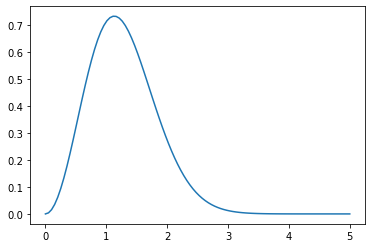

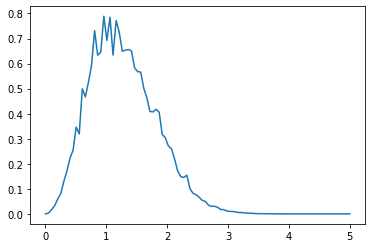

In [2]:
p = np.linspace(0,5,100)
T = 0.8 #proportional to temp
f = np.sqrt(2/np.pi)*p**2*(np.e**((-p**2)/(2*T**2))/T**3) #thermal equilibrium probability distribution function

plt.figure()
plt.plot(p,f)
plt.show()

rand_arr = rg.standard_normal(len(p))
f = (f*rand_arr/10)+f

plt.figure()
plt.plot(p,f)
plt.show()

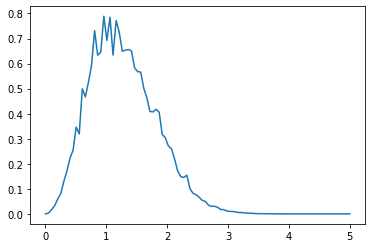

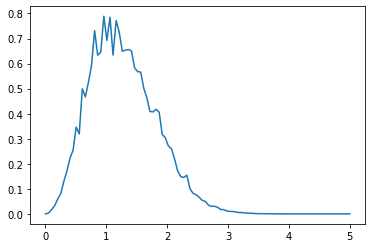

In [3]:
c_new = nu_e_new.driver(p,T,f,p[1]-p[0])

plt.figure()
plt.plot(p,f+c_new)
plt.show()

c_old = nu_e_old.driver(p,T,f,p[1]-p[0])

plt.figure()
plt.plot(p,f+c_old)
plt.show()

<ipython-input-4-303266b86ad8>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(p,abs(c_new-c_old)/abs(c_new+c_old))


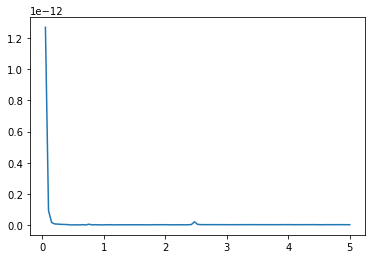

In [4]:
plt.figure()
plt.plot(p,abs(c_new-c_old)/abs(c_new+c_old))
plt.show()